In [1]:
from bs4 import BeautifulSoup
import requests

url = "https://en.m.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"
page = requests.get(url)
soup = BeautifulSoup(page.text,'html')
print(soup)

<!DOCTYPE html>

<html class="client-nojs skin-theme-clientpref-day mf-expand-sections-clientpref-0 mf-font-size-clientpref-small mw-mf-amc-clientpref-0" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js skin-theme-clientpref-day mf-expand-sections-clientpref-0 mf-font-size-clientpref-small mw-mf-amc-clientpref-0";var cookie=document.cookie.match(/(?:^|; )enwikimwclientpreferences=([^;]+)/);if(cookie){cookie[1].split('%2C').forEach(function(pref){className=className.replace(new RegExp('(^| )'+pref.replace(/-clientpref-\w+$|[^\w-]+/g,'')+'-clientpref-\\w+( |$)'),'$1'+pref+'$2');});}document.documentElement.className=className;}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","Octobe

In [5]:
soup.find('table', class_= "wikitable sortable")

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><noscript><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" width="11"/></noscript><span class="lazy-image-placeholder" data-alt="Increase" data-class="mw-file-element" data-height="11" data-src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" data-srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b

In [7]:
table = soup.find('table', class_= "wikitable sortable")
print(table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><noscript><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" width="11"/></noscript><span class="lazy-image-placeholder" data-alt="Increase" data-class="mw-file-element" data-height="11" data-src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" data-srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b

In [15]:
# Get all the table header

Header = table.find_all('th')
print(Header)

[<th>Rank
</th>, <th>Name
</th>, <th>Industry
</th>, <th>Revenue <br/>(USD millions)
</th>, <th>Revenue growth
</th>, <th>Employees
</th>, <th>Headquarters
</th>]


In [16]:
Title = [title.text.strip() for title in Header]
print(Title)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [20]:
import pandas as pd
df = pd.DataFrame(columns = Title)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [22]:
column_data = table.find_all('tr')
print(column_data)

[<tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>, <tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><noscript><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" width="11"/></noscript><span class="lazy-image-placeholder" data-alt="Increase" data-class="mw-file-element" data-height="11" data-src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" data-srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimed

In [30]:
# get all the table data (rows)
# first one row is [] so avoid that empty row give[1:]

for row in column_data[1:]:
    row_data = row.find_all('td')
    Row = [data.text.strip() for data in row_data]
    # print(Row)
    length = len(df)
    df.loc[length] = Row

In [31]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"


In [33]:
# export this table as a csv file
df.to_csv(r'C:\Users\eqtyt\Desktop\Python\data.csv', index = False)

# Reading in files

In [6]:
import pandas as pd
#to avoid that .... in between the table
pd.set_option('display.max.rows', 100)
df = pd.read_csv(r"C:\Users\eqtyt\Desktop\Python\data.csv")
df


,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
5,6,CVS Health,Healthcare,"357,776",10.9%,"259,500","Woonsocket, Rhode Island"
6,7,ExxonMobil,Petroleum industry,"344,582",-16.7%,"61,500","Spring, Texas"
7,8,Alphabet,Technology and cloud computing,"307,394",8.7%,"182,502","Mountain View, California"
8,9,McKesson Corporation,Health,"276,711",4.8%,"48,000","Irving, Texas"
9,10,Cencora,Pharmacy wholesale,"262,173",9.9%,"44,000","Conshohocken, Pennsylvania"


In [9]:
# read text file
df = pd.read_csv(r"C:\Users\eqtyt\Desktop\flatlist.txt", delimiter='\t')
df

,how to calculate calories
0,Example:
1,current meal calories = 500
2,total daily calories = 2000
3,POC = CMC / TDC * 100
4,POC = 500/2000 = 25%
...,...
384,"color: 'white',"
385,"fontSize: 20,"
386,"fontWeight: '600',"
387,"},"


In [10]:
# read the table

df = pd.read_table(r"C:\Users\eqtyt\Desktop\Python\data.csv")
df

,"Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters"
0,"1,Walmart,Retail,""648,125"",6.0%,""2,100,000"",""B..."
1,"2,Amazon,Retail and cloud computing,""574,785"",..."
2,"3,Apple,Electronics industry,""383,482"",-2.8%,""..."
3,"4,UnitedHealth Group,Healthcare,""371,622"",14.6..."
4,"5,Berkshire Hathaway,Conglomerate,""364,482"",20..."
...,...
95,"96,TIAA,Financials,""45,735"",11.8%,""16,023"",""Ne..."
96,"97,CHS,Agriculture cooperative,""45,590"",-4.6%,..."
97,"98,Bristol-Myers Squibb,Pharmaceutical industr..."
98,"99,Dow Chemical Company,Chemical industry,""44,..."


In [30]:
# read json file

df = pd.read_json(r"C:\Users\eqtyt\Desktop\sample.json")
df

,productCode,preferredSupplier,costPerUnitOfMeasure,packSize,minStockHolding,preparationYield,packCost,saleCost,store,country,...,weight,barcode,status,contractStatus,specificationDescription,retailUsage,_id,createdAt,updatedAt,__v
0,A123,Sample,20,small,5,oil,700,750,Murugan Store,India,...,100 g/ml,AGHGH,Active,Contracted,,True,65814c6a91095482b3b694de,2023-12-19T07:55:22.572Z,2023-12-19T07:55:22.572Z,0


In [8]:
# read Excel file
import pandas as pd
df1 = pd.read_excel(r"C:\Users\eqtyt\Desktop\Data.xlsx", sheet_name='Sheet1')
df1

,s.no,name,standard,English,Maths,Science,Social,Computer,Total
0,1,Akash,VII,68,88,78,88,98,420
1,2,Balaji,VII,65,90,49,87,80,371
2,3,Daniel,VII,56,87,89,79,78,389
3,4,Fathima,VII,74,76,69,80,56,355
4,5,Ganesh,VII,45,65,73,90,78,351


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   s.no      5 non-null      int64 
 1   name      5 non-null      object
 2   standard  5 non-null      object
 3   English   5 non-null      int64 
 4   Maths     5 non-null      int64 
 5   Science   5 non-null      int64 
 6   Social    5 non-null      int64 
 7   Computer  5 non-null      int64 
 8   Total     5 non-null      int64 
dtypes: int64(7), object(2)
memory usage: 492.0+ bytes


In [11]:
df1.shape

(5, 9)

In [15]:
# display only first two rows
df1.head(2)

,s.no,name,standard,English,Maths,Science,Social,Computer,Total
0,1,Akash,VII,68,88,78,88,98,420
1,2,Balaji,VII,65,90,49,87,80,371


In [14]:
# display last three rows
df1.tail(3)

,s.no,name,standard,English,Maths,Science,Social,Computer,Total
2,3,Daniel,VII,56,87,89,79,78,389
3,4,Fathima,VII,74,76,69,80,56,355
4,5,Ganesh,VII,45,65,73,90,78,351


In [17]:
df1['name']

0      Akash
1     Balaji
2     Daniel
3    Fathima
4     Ganesh
Name: name, dtype: object

In [18]:
# display only index 4 student details
df1.loc[4]

s.no             5
name        Ganesh
standard       VII
English         45
Maths           65
Science         73
Social          90
Computer        78
Total          351
Name: 4, dtype: object

In [19]:
# display only index 4 student details
df1.iloc[4]

s.no             5
name        Ganesh
standard       VII
English         45
Maths           65
Science         73
Social          90
Computer        78
Total          351
Name: 4, dtype: object

# filtering and ordering

In [20]:
import pandas as pd

df = pd.read_csv(r"C:\Users\eqtyt\Desktop\Python\data.csv")
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
5,6,CVS Health,Healthcare,"357,776",10.9%,"259,500","Woonsocket, Rhode Island"
6,7,ExxonMobil,Petroleum industry,"344,582",-16.7%,"61,500","Spring, Texas"
7,8,Alphabet,Technology and cloud computing,"307,394",8.7%,"182,502","Mountain View, California"
8,9,McKesson Corporation,Health,"276,711",4.8%,"48,000","Irving, Texas"
9,10,Cencora,Pharmacy wholesale,"262,173",9.9%,"44,000","Conshohocken, Pennsylvania"


In [22]:
#display first 10 rank column

df[df ['Rank'] <= 10]

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
5,6,CVS Health,Healthcare,"357,776",10.9%,"259,500","Woonsocket, Rhode Island"
6,7,ExxonMobil,Petroleum industry,"344,582",-16.7%,"61,500","Spring, Texas"
7,8,Alphabet,Technology and cloud computing,"307,394",8.7%,"182,502","Mountain View, California"
8,9,McKesson Corporation,Health,"276,711",4.8%,"48,000","Irving, Texas"
9,10,Cencora,Pharmacy wholesale,"262,173",9.9%,"44,000","Conshohocken, Pennsylvania"


In [28]:
#filter 'Amazon' & 'CVS Health' from 'Name'

specific_name = ['Amazon', 'CVS Health']
df[df['Name'].isin(specific_name)]

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
5,6,CVS Health,Healthcare,"357,776",10.9%,"259,500","Woonsocket, Rhode Island"


In [30]:
#filter 'Industry' contains 'Healthcare'

df[df['Industry'].str.contains('Healthcare')]

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
5,6,CVS Health,Healthcare,"357,776",10.9%,"259,500","Woonsocket, Rhode Island"
13,14,Cardinal Health,Healthcare,"205,012",13.0%,"47,520","Dublin, Ohio"
19,20,Elevance Health,Healthcare,"171,340",9.4%,"104,900","Indianapolis, Indiana"
21,22,Centene,Healthcare,"153,999",6.5%,"67,700","St. Louis, Missouri"
60,61,HCA Healthcare,Healthcare,"64,968",7.9%,"265,000","Nashville, Tennessee"


In [31]:
# filter 'Industry' as an index
df2 = df.set_index('Industry')
df2

,Rank,Name,Revenue (USD millions),Revenue growth,Employees,Headquarters
Industry,,,,,,
Retail,1,Walmart,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
Retail and cloud computing,2,Amazon,"574,785",11.9%,"1,525,000","Seattle, Washington"
Electronics industry,3,Apple,"383,482",-2.8%,"161,000","Cupertino, California"
Healthcare,4,UnitedHealth Group,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
Conglomerate,5,Berkshire Hathaway,"364,482",20.7%,"396,500","Omaha, Nebraska"
Healthcare,6,CVS Health,"357,776",10.9%,"259,500","Woonsocket, Rhode Island"
Petroleum industry,7,ExxonMobil,"344,582",-16.7%,"61,500","Spring, Texas"
Technology and cloud computing,8,Alphabet,"307,394",8.7%,"182,502","Mountain View, California"
Health,9,McKesson Corporation,"276,711",4.8%,"48,000","Irving, Texas"


In [33]:

# get only 'Name' and 'Industry' columns

df2.filter(items = ['Name', 'Industry'], axis = 1)


,Name
Industry,
Retail,Walmart
Retail and cloud computing,Amazon
Electronics industry,Apple
Healthcare,UnitedHealth Group
Conglomerate,Berkshire Hathaway
Healthcare,CVS Health
Petroleum industry,ExxonMobil
Technology and cloud computing,Alphabet
Health,McKesson Corporation


In [35]:
df2.filter(like='Healthcare', axis = 0)

,Rank,Name,Revenue (USD millions),Revenue growth,Employees,Headquarters
Industry,,,,,,
Healthcare,4,UnitedHealth Group,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
Healthcare,6,CVS Health,"357,776",10.9%,"259,500","Woonsocket, Rhode Island"
Healthcare,14,Cardinal Health,"205,012",13.0%,"47,520","Dublin, Ohio"
Healthcare,20,Elevance Health,"171,340",9.4%,"104,900","Indianapolis, Indiana"
Healthcare,22,Centene,"153,999",6.5%,"67,700","St. Louis, Missouri"
Healthcare,61,HCA Healthcare,"64,968",7.9%,"265,000","Nashville, Tennessee"


In [38]:
df2.filter(like='Healthcare', axis = 0)

,Rank,Name,Revenue (USD millions),Revenue growth,Employees,Headquarters
Industry,,,,,,
Healthcare,4,UnitedHealth Group,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
Healthcare,6,CVS Health,"357,776",10.9%,"259,500","Woonsocket, Rhode Island"
Healthcare,14,Cardinal Health,"205,012",13.0%,"47,520","Dublin, Ohio"
Healthcare,20,Elevance Health,"171,340",9.4%,"104,900","Indianapolis, Indiana"
Healthcare,22,Centene,"153,999",6.5%,"67,700","St. Louis, Missouri"
Healthcare,61,HCA Healthcare,"64,968",7.9%,"265,000","Nashville, Tennessee"


In [43]:
df2.loc['Healthcare']

,Rank,Name,Revenue (USD millions),Revenue growth,Employees,Headquarters
Industry,,,,,,
Healthcare,4,UnitedHealth Group,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
Healthcare,6,CVS Health,"357,776",10.9%,"259,500","Woonsocket, Rhode Island"
Healthcare,14,Cardinal Health,"205,012",13.0%,"47,520","Dublin, Ohio"
Healthcare,20,Elevance Health,"171,340",9.4%,"104,900","Indianapolis, Indiana"
Healthcare,22,Centene,"153,999",6.5%,"67,700","St. Louis, Missouri"
Healthcare,61,HCA Healthcare,"64,968",7.9%,"265,000","Nashville, Tennessee"


In [44]:
df2.iloc[3]

Rank                                          4
Name                         UnitedHealth Group
Revenue (USD millions)                  371,622
Revenue growth                            14.6%
Employees                               440,000
Headquarters              Minnetonka, Minnesota
Name: Healthcare, dtype: object

In [49]:
# sort
df[df['Rank'] < 10].sort_values(by=['Rank','Name'], ascending = True)

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
5,6,CVS Health,Healthcare,"357,776",10.9%,"259,500","Woonsocket, Rhode Island"
6,7,ExxonMobil,Petroleum industry,"344,582",-16.7%,"61,500","Spring, Texas"
7,8,Alphabet,Technology and cloud computing,"307,394",8.7%,"182,502","Mountain View, California"
8,9,McKesson Corporation,Health,"276,711",4.8%,"48,000","Irving, Texas"


In [51]:
# descending order - 1st descending Rank and 2nd descending Name
df[df['Rank'] < 10].sort_values(by=['Rank','Name'], ascending = False)

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
8,9,McKesson Corporation,Health,"276,711",4.8%,"48,000","Irving, Texas"
7,8,Alphabet,Technology and cloud computing,"307,394",8.7%,"182,502","Mountain View, California"
6,7,ExxonMobil,Petroleum industry,"344,582",-16.7%,"61,500","Spring, Texas"
5,6,CVS Health,Healthcare,"357,776",10.9%,"259,500","Woonsocket, Rhode Island"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"


# Indexing

In [54]:
import pandas as pd
pf = pd.read_csv(r'C:\Users\eqtyt\Desktop\Python\data.csv',index_col='Name')
pf

,Rank,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
Name,,,,,,
Walmart,1,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
Amazon,2,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
Apple,3,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
UnitedHealth Group,4,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
Berkshire Hathaway,5,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
CVS Health,6,Healthcare,"357,776",10.9%,"259,500","Woonsocket, Rhode Island"
ExxonMobil,7,Petroleum industry,"344,582",-16.7%,"61,500","Spring, Texas"
Alphabet,8,Technology and cloud computing,"307,394",8.7%,"182,502","Mountain View, California"
McKesson Corporation,9,Health,"276,711",4.8%,"48,000","Irving, Texas"


In [61]:
# reset the index (from Name to Index)
df.reset_index(inplace = True)
df

,level_0,Employees,index,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Headquarters
0,0,"2,100,000",0,1,Walmart,Retail,"648,125",6.0%,"Bentonville, Arkansas"
1,1,"1,525,000",1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"Seattle, Washington"
2,2,"161,000",2,3,Apple,Electronics industry,"383,482",-2.8%,"Cupertino, California"
3,3,"440,000",3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"Minnetonka, Minnesota"
4,4,"396,500",4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"Omaha, Nebraska"
5,5,"259,500",5,6,CVS Health,Healthcare,"357,776",10.9%,"Woonsocket, Rhode Island"
6,6,"61,500",6,7,ExxonMobil,Petroleum industry,"344,582",-16.7%,"Spring, Texas"
7,7,"182,502",7,8,Alphabet,Technology and cloud computing,"307,394",8.7%,"Mountain View, California"
8,8,"48,000",8,9,McKesson Corporation,Health,"276,711",4.8%,"Irving, Texas"
9,9,"44,000",9,10,Cencora,Pharmacy wholesale,"262,173",9.9%,"Conshohocken, Pennsylvania"


In [56]:
df.set_index('Employees', inplace = True)
df

,index,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Headquarters
Employees,,,,,,,
"2,100,000",0,1,Walmart,Retail,"648,125",6.0%,"Bentonville, Arkansas"
"1,525,000",1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"Seattle, Washington"
"161,000",2,3,Apple,Electronics industry,"383,482",-2.8%,"Cupertino, California"
"440,000",3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"Minnetonka, Minnesota"
"396,500",4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"Omaha, Nebraska"
"259,500",5,6,CVS Health,Healthcare,"357,776",10.9%,"Woonsocket, Rhode Island"
"61,500",6,7,ExxonMobil,Petroleum industry,"344,582",-16.7%,"Spring, Texas"
"182,502",7,8,Alphabet,Technology and cloud computing,"307,394",8.7%,"Mountain View, California"
"48,000",8,9,McKesson Corporation,Health,"276,711",4.8%,"Irving, Texas"


In [58]:
# filter index[1] data
df.iloc[1]

index                                              1
Rank                                               2
Name                                          Amazon
Industry                  Retail and cloud computing
Revenue (USD millions)                       574,785
Revenue growth                                 11.9%
Headquarters                     Seattle, Washington
Name: 1,525,000, dtype: object

In [59]:
# reset indexes
df.reset_index(inplace = True)
df

,Employees,index,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Headquarters
0,"2,100,000",0,1,Walmart,Retail,"648,125",6.0%,"Bentonville, Arkansas"
1,"1,525,000",1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"Seattle, Washington"
2,"161,000",2,3,Apple,Electronics industry,"383,482",-2.8%,"Cupertino, California"
3,"440,000",3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"Minnetonka, Minnesota"
4,"396,500",4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"Omaha, Nebraska"
5,"259,500",5,6,CVS Health,Healthcare,"357,776",10.9%,"Woonsocket, Rhode Island"
6,"61,500",6,7,ExxonMobil,Petroleum industry,"344,582",-16.7%,"Spring, Texas"
7,"182,502",7,8,Alphabet,Technology and cloud computing,"307,394",8.7%,"Mountain View, California"
8,"48,000",8,9,McKesson Corporation,Health,"276,711",4.8%,"Irving, Texas"
9,"44,000",9,10,Cencora,Pharmacy wholesale,"262,173",9.9%,"Conshohocken, Pennsylvania"


In [63]:
# search
pf = pd.read_csv(r'C:\Users\eqtyt\Desktop\Python\data.csv')
pf


,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
5,6,CVS Health,Healthcare,"357,776",10.9%,"259,500","Woonsocket, Rhode Island"
6,7,ExxonMobil,Petroleum industry,"344,582",-16.7%,"61,500","Spring, Texas"
7,8,Alphabet,Technology and cloud computing,"307,394",8.7%,"182,502","Mountain View, California"
8,9,McKesson Corporation,Health,"276,711",4.8%,"48,000","Irving, Texas"
9,10,Cencora,Pharmacy wholesale,"262,173",9.9%,"44,000","Conshohocken, Pennsylvania"


In [70]:
df.iloc[2]


level_0                                       2
Employees                               161,000
index                                         2
Rank                                          3
Name                                      Apple
Industry                   Electronics industry
Revenue (USD millions)                  383,482
Revenue growth                            -2.8%
Headquarters              Cupertino, California
Name: 2, dtype: object

In [71]:
df.loc[2]

level_0                                       2
Employees                               161,000
index                                         2
Rank                                          3
Name                                      Apple
Industry                   Electronics industry
Revenue (USD millions)                  383,482
Revenue growth                            -2.8%
Headquarters              Cupertino, California
Name: 2, dtype: object

# Group by and Aggregation

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(r'C:\Users\eqtyt\Desktop\Python\Flavors.csv')
df

,Flavor,Base Flavor,Liked,Flavor Rating,Texture Rating,Total Rating
0,Mint Chocolate Chip,Vanilla,Yes,10.0,8.0,18.0
1,Chocolate,Chocolate,Yes,8.8,7.6,16.6
2,Vanilla,Vanilla,No,4.7,5.0,9.7
3,Cookie Dough,Vanilla,Yes,6.9,6.5,13.4
4,Rocky Road,Chocolate,Yes,8.2,7.0,15.2
5,Pistachio,Vanilla,No,2.3,3.4,5.7
6,Cake Batter,Vanilla,Yes,6.5,6.0,12.5
7,Neapolitan,Vanilla,No,3.8,5.0,8.8
8,Chocolte Fudge Brownie,Chocolate,Yes,8.2,7.1,15.3


In [36]:
import pandas as pd

# Read the CSV file
df = pd.read_csv(r'C:\Users\eqtyt\Desktop\Python\Flavors.csv')

# Group by 'Base Flavor' and aggregate
grouped = df.groupby('Base Flavor').agg({
    'Flavor': 'first',        # Select the first entry
    'Liked': 'first',         # Select the first entry
    'Flavor Rating': 'mean',  # Calculate the mean of 'Flavor Rating'
    'Texture Rating': 'mean', # Calculate the mean of 'Texture Rating'
    'Total Rating': 'mean'    # Calculate the mean of 'Total Rating'
}).reset_index()

# Format the DataFrame for display
grouped['Flavor Rating'] = grouped['Flavor Rating'].round(2)
grouped['Texture Rating'] = grouped['Texture Rating'].round(2)
grouped['Total Rating'] = grouped['Total Rating'].round(2)

# Display the DataFrame
print(grouped.to_string(index=False))



Base Flavor              Flavor Liked  Flavor Rating  Texture Rating  Total Rating
  Chocolate           Chocolate   Yes            8.4            7.23         15.70
    Vanilla Mint Chocolate Chip   Yes            5.7            5.65         11.35


In [44]:
# average

print(grouped.to_string(index=False))

Base Flavor              Flavor Liked  Flavor Rating  Texture Rating  Total Rating
  Chocolate           Chocolate   Yes            8.4            7.23         15.70
    Vanilla Mint Chocolate Chip   Yes            5.7            5.65         11.35


In [30]:
# count
df.groupby('Base Flavor').count()

,Flavor,Liked,Flavor Rating,Texture Rating,Total Rating
Base Flavor,,,,,
Chocolate,3,3,3,3,3
Vanilla,6,6,6,6,6


In [32]:
# min value from chocolate group
df.groupby('Base Flavor').min()

,Flavor,Liked,Flavor Rating,Texture Rating,Total Rating
Base Flavor,,,,,
Chocolate,Chocolate,Yes,8.2,7.0,15.2
Vanilla,Cake Batter,No,2.3,3.4,5.7


In [33]:
# max value from grouped chocolate and vanilla
df.groupby('Base Flavor').max()

,Flavor,Liked,Flavor Rating,Texture Rating,Total Rating
Base Flavor,,,,,
Chocolate,Rocky Road,Yes,8.8,7.6,16.6
Vanilla,Vanilla,Yes,10.0,8.0,18.0


In [48]:
# To get sum of numeric value only without string (Flavor details and Liked details - don't want)

# Select only numeric columns for aggregation
numeric_df = df.select_dtypes(include='number')

# Group by 'Base Flavor' and calculate the sum for numeric columns only
aggregated_sum = numeric_df.groupby(df['Base Flavor']).sum().reset_index()

# Display the result
print(aggregated_sum)

  Base Flavor  Flavor Rating  Texture Rating  Total Rating
0   Chocolate           25.2            21.7          47.1
1     Vanilla           34.2            33.9          68.1


In [53]:
# aggregate 'mean, max, count, sum' all the details for 'Base Flavor', 'Texture Rating', 'Total Rating' at a time

df.groupby('Base Flavor').agg({'Flavor Rating': ['mean', 'min','max', 'count', 'sum'], 'Texture Rating': ['mean', 'min','max', 'count', 'sum'], 'Total Rating': ['mean', 'min','max', 'count', 'sum']})

Flavor Rating                        Texture Rating            \
                     mean  min   max count   sum           mean  min  max   
Base Flavor                                                                 
Chocolate             8.4  8.2   8.8     3  25.2       7.233333  7.0  7.6   
Vanilla               5.7  2.3  10.0     6  34.2       5.650000  3.4  8.0   

                        Total Rating                          
            count   sum         mean   min   max count   sum  
Base Flavor                                                   
Chocolate       3  21.7        15.70  15.2  16.6     3  47.1  
Vanilla         6  33.9        11.35   5.7  18.0     6  68.1

In [65]:
# groupby both 'Base Flavor' and 'Liked'

# Select only numeric columns for aggregation
numeric_columns = df.select_dtypes(include='number')

# Group by both 'Base Flavor' and 'Liked' and calculate the mean for numeric columns only
grouped_mean = df.groupby(['Base Flavor', 'Liked'])[numeric_columns.columns].mean().reset_index()

# Display the result
print(grouped_mean)

  Base Flavor Liked  Flavor Rating  Texture Rating  Total Rating
0   Chocolate   Yes            8.4        7.233333     15.700000
1     Vanilla    No            3.6        4.466667      8.066667
2     Vanilla   Yes            7.8        6.833333     14.633333


In [69]:
df.groupby(['Base Flavor', 'Liked']).agg({'Flavor Rating': ['mean', 'min','max', 'count', 'sum']})

Flavor Rating                       
                           mean  min   max count   sum
Base Flavor Liked                                     
Chocolate   Yes             8.4  8.2   8.8     3  25.2
Vanilla     No              3.6  2.3   4.7     3  10.8
            Yes             7.8  6.5  10.0     3  23.4

In [71]:
# Select only numeric columns for aggregation
numeric_df = df.select_dtypes(include='number')

# Group by 'Base Flavor' and calculate the sum for numeric columns only
numeric_df.groupby(df['Base Flavor']).describe()

Flavor Rating                                             \
                    count mean       std  min    25%  50%  75%   max   
Base Flavor                                                            
Chocolate             3.0  8.4  0.346410  8.2  8.200  8.2  8.5   8.8   
Vanilla               6.0  5.7  2.710719  2.3  4.025  5.6  6.8  10.0   

            Texture Rating            ...             Total Rating         \
                     count      mean  ...    75%  max        count   mean   
Base Flavor                           ...                                   
Chocolate              3.0  7.233333  ...  7.350  7.6          3.0  15.70   
Vanilla                6.0  5.650000  ...  6.375  8.0          6.0  11.35   

                                                         
                  std   min     25%   50%     75%   max  
Base Flavor                                              
Chocolate    0.781025  15.2  15.250  15.3  15.950  16.6  
Vanilla      4.263684   5.7   9.025  11.1  13.175  18.0  

[2 rows x 24 columns]

# Merge, Join and Concatenate

# inner join, outer join, left join, right join

In [33]:
# inner join - only commin values from two tables

import pandas as pd
df1 = pd.read_csv(r'C:\Users\eqtyt\Desktop\Python\LOTR.csv')
df1

,FellowshipID,FirstName,Skills
0,1001,Frodo,Hiding
1,1002,Samwise,Gardening
2,1003,Gandalf,Spells
3,1004,Pippin,Fireworks


In [35]:
df2 = pd.read_csv(r'C:\Users\eqtyt\Desktop\Python\LOTR 2.csv')
df2

,FellowshipID,FirstName,Age
0,1001,Frodo,50
1,1002,Samwise,39
2,1006,Legolas,2931
3,1007,Elrond,6520
4,1008,Barromir,51


# merge

In [21]:
# merge df1 and df2
# get only common field from both table using FellowshipID

df1.merge(df2, how ='inner')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


In [ ]:
# outer join - all the data from both table

In [23]:
# get all the fields from both table 

df1.merge(df2, how = 'outer')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
4,1006,Legolas,NaN,2931.0
5,1007,Elrond,NaN,6520.0
6,1008,Barromir,NaN,51.0


In [ ]:
# Left join - get the data from left table

In [25]:
df1.merge(df2, how = 'left')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN


In [ ]:
# right join - get the data from right table

In [27]:
df1.merge(df2, how = 'right')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39
2,1006,Legolas,NaN,2931
3,1007,Elrond,NaN,6520
4,1008,Barromir,NaN,51


In [ ]:
# cross join

In [29]:
# first take table1 FellowshipID '1001' and check all the other data with table 2. Like this it will continue 

df1.merge(df2, how = 'cross')

,FellowshipID_x,FirstName_x,Skills,FellowshipID_y,FirstName_y,Age
0,1001,Frodo,Hiding,1001,Frodo,50
1,1001,Frodo,Hiding,1002,Samwise,39
2,1001,Frodo,Hiding,1006,Legolas,2931
3,1001,Frodo,Hiding,1007,Elrond,6520
4,1001,Frodo,Hiding,1008,Barromir,51
5,1002,Samwise,Gardening,1001,Frodo,50
6,1002,Samwise,Gardening,1002,Samwise,39
7,1002,Samwise,Gardening,1006,Legolas,2931
8,1002,Samwise,Gardening,1007,Elrond,6520
9,1002,Samwise,Gardening,1008,Barromir,51


# join

In [ ]:
# outer join without using merge

In [45]:
df1.join(df2, on='FellowshipID', how='outer', lsuffix='_Left', rsuffix='_Right')

,FellowshipID,FellowshipID_Left,FirstName_Left,Skills,FellowshipID_Right,FirstName_Right,Age
NaN,0,NaN,NaN,NaN,1001.0,Frodo,50.0
NaN,1,NaN,NaN,NaN,1002.0,Samwise,39.0
NaN,2,NaN,NaN,NaN,1006.0,Legolas,2931.0
NaN,3,NaN,NaN,NaN,1007.0,Elrond,6520.0
NaN,4,NaN,NaN,NaN,1008.0,Barromir,51.0
0.0,1001,1001.0,Frodo,Hiding,NaN,NaN,NaN
1.0,1002,1002.0,Samwise,Gardening,NaN,NaN,NaN
2.0,1003,1003.0,Gandalf,Spells,NaN,NaN,NaN
3.0,1004,1004.0,Pippin,Fireworks,NaN,NaN,NaN


In [53]:

# another way for outer join

df4 = df1.set_index('FellowshipID').join(df2.set_index('FellowshipID'), lsuffix = '_Left', rsuffix = '_Right', how='outer')
df4

,FirstName_Left,Skills,FirstName_Right,Age
FellowshipID,,,,
1001,Frodo,Hiding,Frodo,50.0
1002,Samwise,Gardening,Samwise,39.0
1003,Gandalf,Spells,NaN,NaN
1004,Pippin,Fireworks,NaN,NaN
1006,NaN,NaN,Legolas,2931.0
1007,NaN,NaN,Elrond,6520.0
1008,NaN,NaN,Barromir,51.0


In [ ]:
# inner join

In [55]:
df5 = df1.set_index('FellowshipID').join(df2.set_index('FellowshipID'), lsuffix = '_Left', rsuffix = '_Right', how='inner')
df5

,FirstName_Left,Skills,FirstName_Right,Age
FellowshipID,,,,
1001,Frodo,Hiding,Frodo,50
1002,Samwise,Gardening,Samwise,39


In [ ]:
# left join

In [57]:
df5 = df1.set_index('FellowshipID').join(df2.set_index('FellowshipID'), lsuffix = '_Left', rsuffix = '_Right', how='left')
df5

,FirstName_Left,Skills,FirstName_Right,Age
FellowshipID,,,,
1001,Frodo,Hiding,Frodo,50.0
1002,Samwise,Gardening,Samwise,39.0
1003,Gandalf,Spells,NaN,NaN
1004,Pippin,Fireworks,NaN,NaN


In [ ]:
# Right  join

In [59]:
df5 = df1.set_index('FellowshipID').join(df2.set_index('FellowshipID'), lsuffix = '_Left', rsuffix = '_Right', how='right')
df5

,FirstName_Left,Skills,FirstName_Right,Age
FellowshipID,,,,
1001,Frodo,Hiding,Frodo,50
1002,Samwise,Gardening,Samwise,39
1006,NaN,NaN,Legolas,2931
1007,NaN,NaN,Elrond,6520
1008,NaN,NaN,Barromir,51


# concatenate

In [76]:
pd.concat([df1,df2], join='outer', axis=1)

,FellowshipID,FirstName,Skills,FellowshipID,FirstName,Age
0,1001.0,Frodo,Hiding,1001,Frodo,50
1,1002.0,Samwise,Gardening,1002,Samwise,39
2,1003.0,Gandalf,Spells,1006,Legolas,2931
3,1004.0,Pippin,Fireworks,1007,Elrond,6520
4,NaN,NaN,NaN,1008,Barromir,51


In [70]:
pd.concat([df1,df2], join='inner')

,FellowshipID,FirstName
0,1001,Frodo
1,1002,Samwise
2,1003,Gandalf
3,1004,Pippin
0,1001,Frodo
1,1002,Samwise
2,1006,Legolas
3,1007,Elrond
4,1008,Barromir


# pandas Vizualization

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv(r"C:\Users\eqtyt\Desktop\Python\Ice Cream Ratings.csv")
df = df.set_index('Date')
df

,Flavor Rating,Texture Rating,Overall Rating
Date,,,
1/1/2022,0.223090,0.040220,0.600129
1/2/2022,0.635886,0.938476,0.106264
1/3/2022,0.442323,0.044154,0.598112
1/4/2022,0.389128,0.549676,0.489353
1/5/2022,0.386887,0.519439,0.988280
1/6/2022,0.877984,0.193588,0.832827
1/7/2022,0.140995,0.325110,0.105147


In [175]:
# styles are available. if you want, you can use it

print(plt.style.available)
plt.style.use('seaborn-v0_8-paper')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Axes: xlabel='Date'>

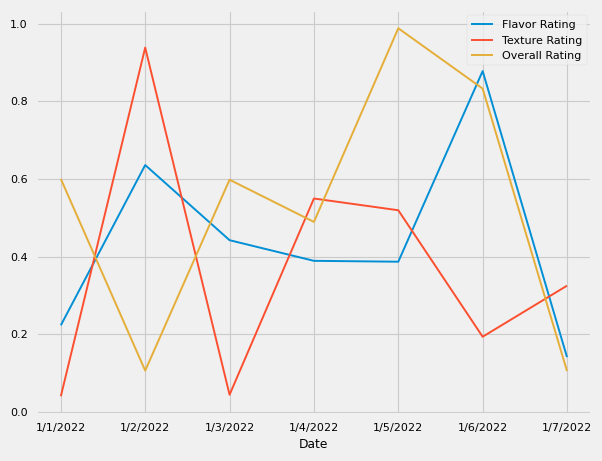

In [177]:
# display line chart using style
df.plot()

<Axes: xlabel='Date'>

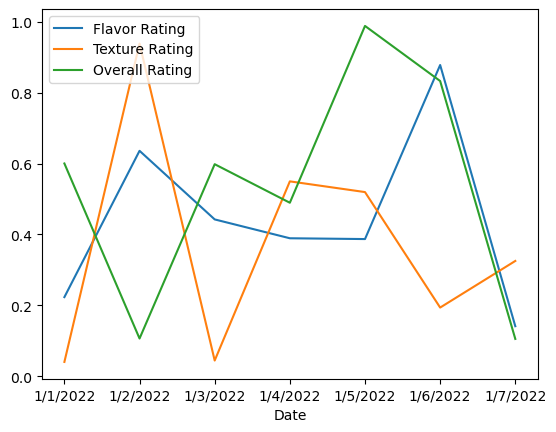

In [98]:
# display line chart

df.plot(kind='line')

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

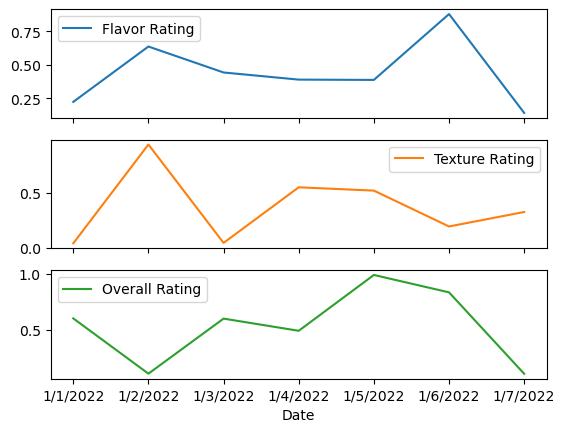

In [117]:
df.plot(kind='line', subplots = True)

<Axes: title={'center': 'Ice cream Rating'}, xlabel='Daily Rating', ylabel='Scores'>

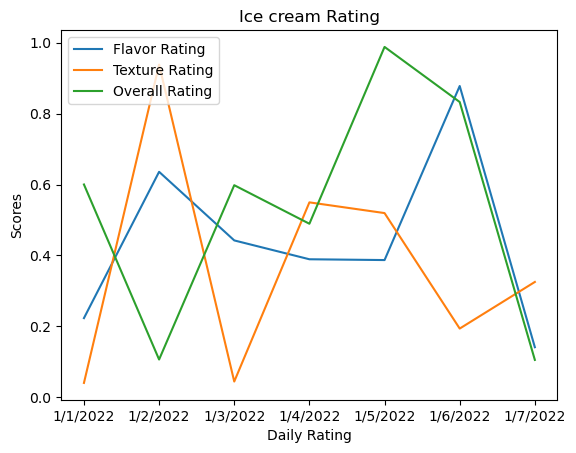

In [121]:
# display line chart with xlabel, ylabel and title

df.plot(kind='line', title = "Ice cream Rating", xlabel="Daily Rating", ylabel="Scores")

<Axes: xlabel='Date'>

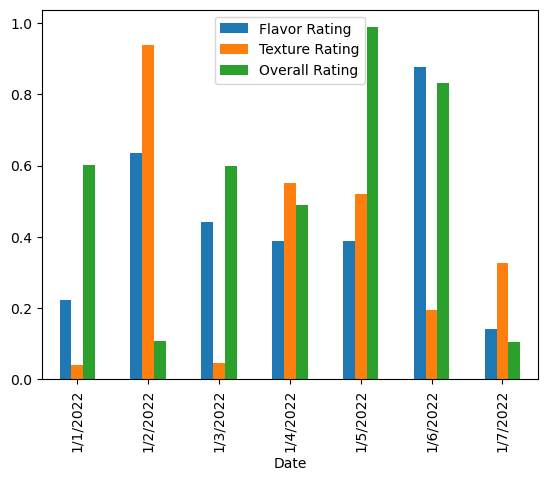

In [125]:

# vertical bar
df.plot(kind='bar')

<Axes: xlabel='Date'>

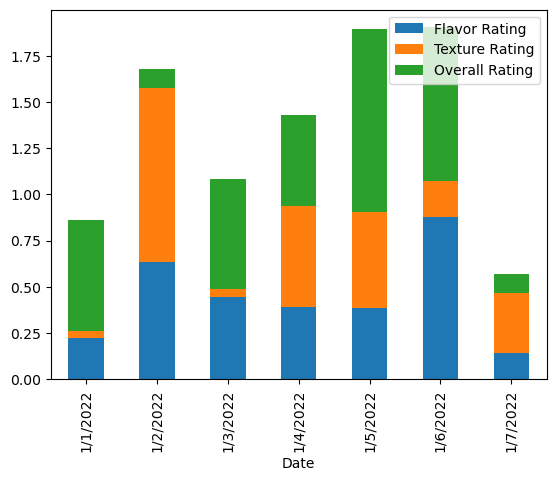

In [127]:
# vertical bar
df.plot(kind='bar', stacked=True)

<Axes: xlabel='Date'>

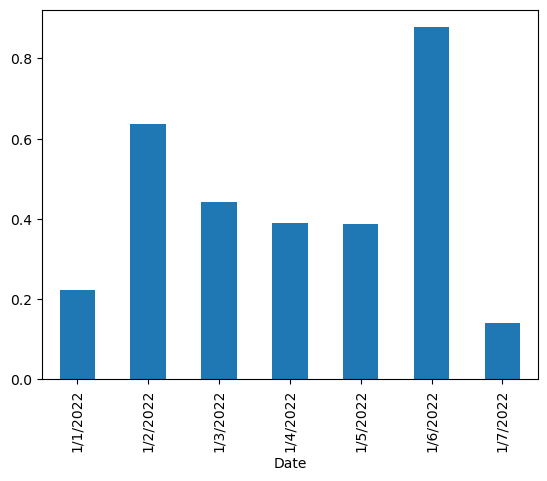

In [129]:
# display only 'Flavor rating' details using line chart

# vertical bar
df['Flavor Rating'].plot(kind='bar', stacked=True)

<Axes: ylabel='Date'>

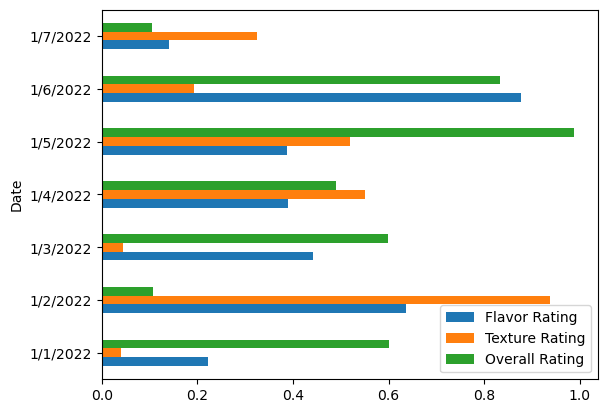

In [102]:
# horizontal bar

df.plot(kind='barh')

<Axes: ylabel='Date'>

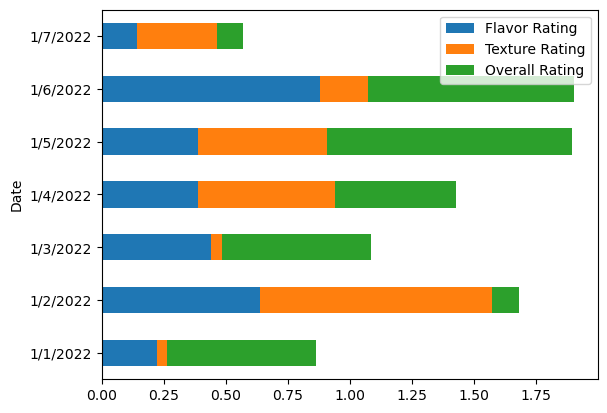

In [131]:
df.plot(kind='barh', stacked = True)

<Axes: xlabel='Date'>

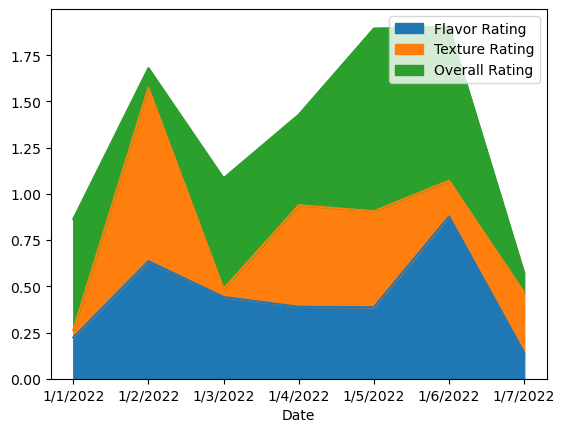

In [106]:
# area chart
df.plot(kind='area')

<Axes: xlabel='Date'>

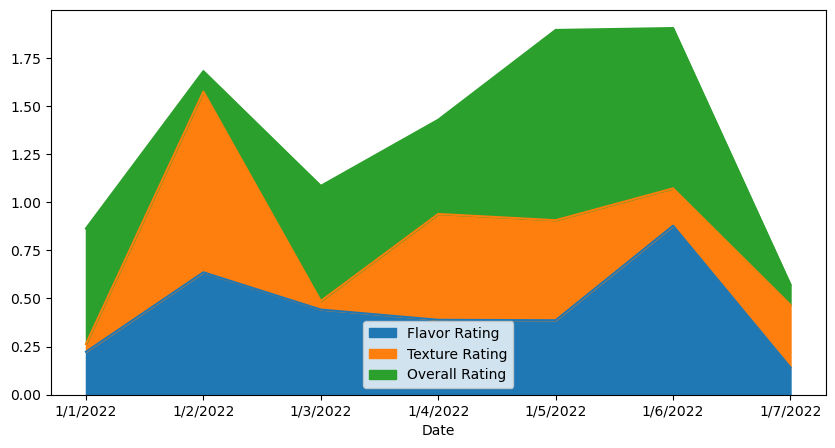

In [157]:
# area chart
df.plot(kind='area', figsize = (10,5))

<Axes: ylabel='Frequency'>

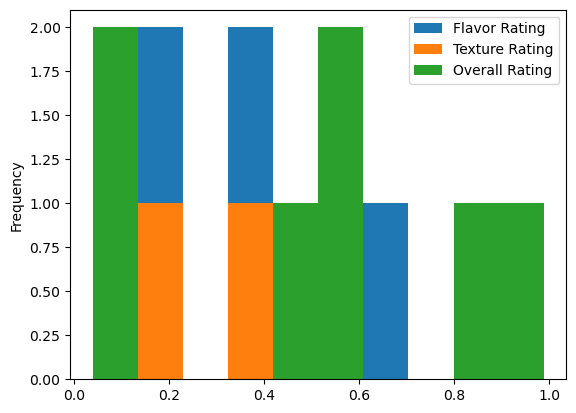

In [110]:
# histogram

df.plot(kind='hist')

<Axes: ylabel='Frequency'>

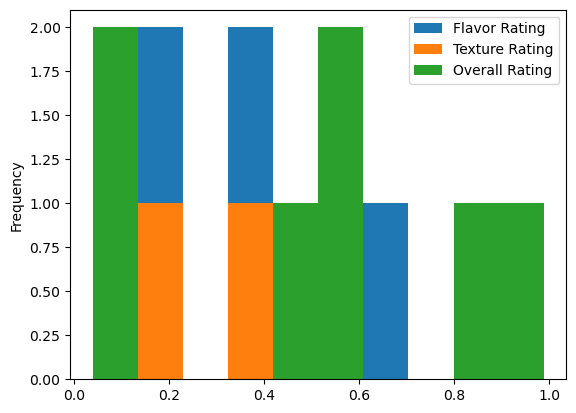

In [137]:
# another way to use histogram (without using kind='hist')

df.plot.hist()

<Axes: ylabel='Frequency'>

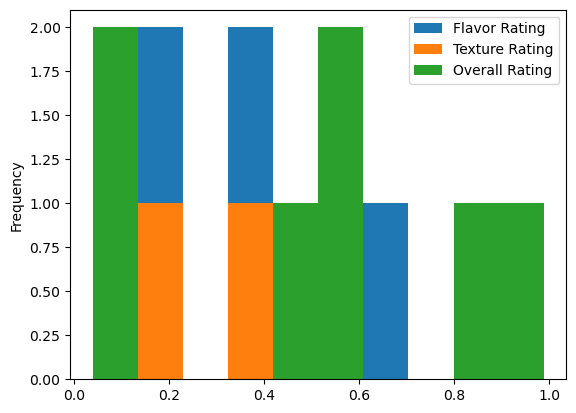

In [149]:
# bins = 5 (size of the bar)

df.plot.hist(bins = 10)

<Axes: >

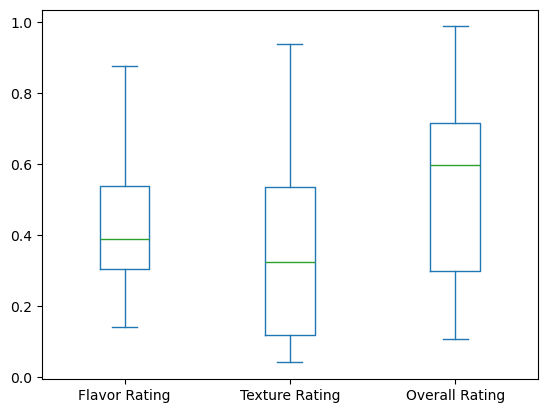

In [153]:
df.plot(kind='box')

<Axes: >

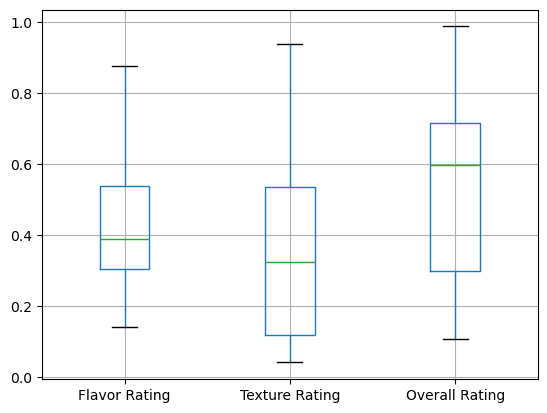

In [155]:
df.boxplot()

<Axes: xlabel='Texture Rating', ylabel='Overall Rating'>

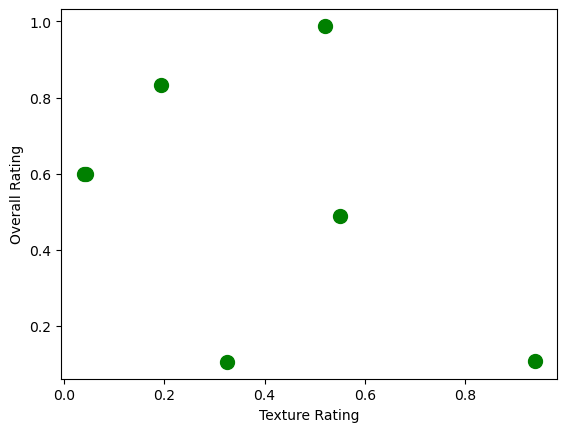

In [143]:
# scatter chart ( s= size, c=color)

df.plot(kind='scatter', x='Texture Rating', y='Overall Rating', s=100, c = 'green')

<Axes: ylabel='Flavor Rating'>

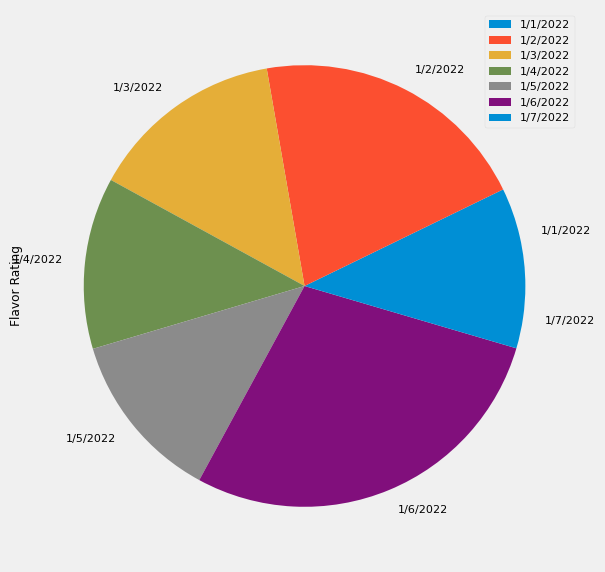

In [181]:
# pie chart

df.plot(kind='pie', y = 'Flavor Rating', figsize = (10,6))

# Data Cleaning in Pandas

In [263]:
import pandas as pd
df = pd.read_excel(r'C:\Users\eqtyt\Desktop\Python\Customer Call List.xlsx')
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No,True
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes,False
2,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN,True
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y,True
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No,True
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes,True
6,1007,Jeff,Winger,NaN,1209 South Street,No,No,False
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No,False
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN,False
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No,True


In [265]:
# drop duplicates value like same CustomerID

df = df.drop_duplicates()
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No,True
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes,False
2,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN,True
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y,True
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No,True
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes,True
6,1007,Jeff,Winger,NaN,1209 South Street,No,No,False
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No,False
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN,False
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No,True


In [267]:
# to drop any column

df = df.drop(columns = "Not_Useful_Column")
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes
2,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes
6,1007,Jeff,Winger,NaN,1209 South Street,No,No
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No


In [269]:
# clean Last_Name like (  /White, ...Potter, Flenderson_ )
# lstrip = left strip
# This will remove ... from name

df["Last_Name"] = df["Last_Name"].str.lstrip("...")
df["Last_Name"] = df["Last_Name"].str.lstrip("/")
df["Last_Name"] = df["Last_Name"].str.rstrip("_")
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes
2,1003,Walter,White,7066950392,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes
6,1007,Jeff,Winger,NaN,1209 South Street,No,No
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No


In [271]:
# another way to clean Last_Name
# 123. means remove ... (three dots)

df["Last_Name"] = df["Last_Name"].str.strip("123._/")

df
                                           

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes
2,1003,Walter,White,7066950392,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes
6,1007,Jeff,Winger,NaN,1209 South Street,No,No
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No


In [273]:
# clean phone_Number
#  change all the number like 123-545-5421


# Define a function to reformat phone numbers
def format_phone_number(phone):
    if pd.isna(phone) or phone in ['None', 'N/a', 'N/a']:
        return ''  # Return an empty string for NaN or None values
    
    # Remove unwanted characters by filtering only digits
    digits = ''.join(c for c in str(phone) if c.isdigit())
    
    # Check if we have exactly 10 digits
    if len(digits) == 10:
        # Format as xxx-xxx-xxxx
        return f"{digits[:3]}-{digits[3:6]}-{digits[6:]}"
    else:
        # Return the cleaned phone number or empty string if not valid
        return '' if digits == '' else phone

# Apply the function to the Phone_Number column
df['Phone_Number'] = df['Phone_Number'].apply(format_phone_number)

# Replace NaN values with empty strings
df['Phone_Number'] = df['Phone_Number'].fillna('')

# Adjust Pandas display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows (optional, be cautious with large dataframes)
pd.set_option('display.max_colwidth', None) # Show full content in each cell

# Print the DataFrame
print(df.to_string(index=False))


 CustomerID First_Name  Last_Name Phone_Number                               Address Paying Customer Do_Not_Contact
       1001      Frodo    Baggins 123-545-5421                 123 Shire Lane, Shire             Yes             No
       1002       Abed      Nadir 123-643-9775                   93 West Main Street              No            Yes
       1003     Walter      White 706-695-0392                    298 Drugs Driveway               N            NaN
       1004     Dwight    Schrute 123-543-2345 980 Paper Avenue, Pennsylvania, 18503             Yes              Y
       1005        Jon       Snow 876-678-3469                      123 Dragons Road               Y             No
       1006        Ron    Swanson 304-762-2467                      768 City Parkway             Yes            Yes
       1007       Jeff     Winger                                  1209 South Street              No             No
       1008   Sherlock     Holmes 876-678-3469                         9

In [275]:
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
1,1002,Abed,Nadir,123-643-9775,93 West Main Street,No,Yes
2,1003,Walter,White,706-695-0392,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y
4,1005,Jon,Snow,876-678-3469,123 Dragons Road,Y,No
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes
6,1007,Jeff,Winger,,1209 South Street,No,No
7,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,N,No
8,1009,Gandalf,NaN,,123 Middle Earth,Yes,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No


In [277]:
# Clean Address field

# split address column - Street_Address, State and Zip_Code

df[["Street_Address", "State", "Zip_Code"]] = df["Address"].str.split(',', n=2, expand = True)
df



,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Street_Address,State,Zip_Code
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No,123 Shire Lane,Shire,None
1,1002,Abed,Nadir,123-643-9775,93 West Main Street,No,Yes,93 West Main Street,None,None
2,1003,Walter,White,706-695-0392,298 Drugs Driveway,N,NaN,298 Drugs Driveway,None,None
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y,980 Paper Avenue,Pennsylvania,18503
4,1005,Jon,Snow,876-678-3469,123 Dragons Road,Y,No,123 Dragons Road,None,None
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes,768 City Parkway,None,None
6,1007,Jeff,Winger,,1209 South Street,No,No,1209 South Street,None,None
7,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,N,No,98 Clue Drive,None,None
8,1009,Gandalf,NaN,,123 Middle Earth,Yes,NaN,123 Middle Earth,None,None
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No,25th Main Street,New York,None


In [279]:
# change paying customer column

df["Paying Customer"] = df["Paying Customer"].str.replace('Yes','Y')
df["Paying Customer"] = df["Paying Customer"].str.replace('No','N')
df["Paying Customer"] = df["Paying Customer"].str.replace('N/a','')
df



,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Street_Address,State,Zip_Code
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Y,No,123 Shire Lane,Shire,None
1,1002,Abed,Nadir,123-643-9775,93 West Main Street,N,Yes,93 West Main Street,None,None
2,1003,Walter,White,706-695-0392,298 Drugs Driveway,N,NaN,298 Drugs Driveway,None,None
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Y,Y,980 Paper Avenue,Pennsylvania,18503
4,1005,Jon,Snow,876-678-3469,123 Dragons Road,Y,No,123 Dragons Road,None,None
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Y,Yes,768 City Parkway,None,None
6,1007,Jeff,Winger,,1209 South Street,N,No,1209 South Street,None,None
7,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,N,No,98 Clue Drive,None,None
8,1009,Gandalf,NaN,,123 Middle Earth,Y,NaN,123 Middle Earth,None,None
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Y,No,25th Main Street,New York,None


In [281]:
# change paying customer column

df["Do_Not_Contact"] = df["Do_Not_Contact"].str.replace('Yes','Y')
df["Do_Not_Contact"] = df["Do_Not_Contact"].str.replace('No','N')
#df["Do_Not_Contact"] = df["Do_Not_Contact"].str.replace('NaN','')

df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Street_Address,State,Zip_Code
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Y,N,123 Shire Lane,Shire,None
1,1002,Abed,Nadir,123-643-9775,93 West Main Street,N,Y,93 West Main Street,None,None
2,1003,Walter,White,706-695-0392,298 Drugs Driveway,N,NaN,298 Drugs Driveway,None,None
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Y,Y,980 Paper Avenue,Pennsylvania,18503
4,1005,Jon,Snow,876-678-3469,123 Dragons Road,Y,N,123 Dragons Road,None,None
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Y,Y,768 City Parkway,None,None
6,1007,Jeff,Winger,,1209 South Street,N,N,1209 South Street,None,None
7,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,N,N,98 Clue Drive,None,None
8,1009,Gandalf,NaN,,123 Middle Earth,Y,NaN,123 Middle Earth,None,None
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Y,N,25th Main Street,New York,None


In [287]:

# To remove NaN, None fields

df = df.fillna('')
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Street_Address,State,Zip_Code
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Y,N,123 Shire Lane,Shire,
2,1003,Walter,White,706-695-0392,298 Drugs Driveway,N,,298 Drugs Driveway,,
4,1005,Jon,Snow,876-678-3469,123 Dragons Road,Y,N,123 Dragons Road,,
7,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,N,N,98 Clue Drive,,
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Y,N,25th Main Street,New York,
11,1012,Harry,Potter,706-695-0392,2394 Hogwarts Avenue,Y,,2394 Hogwarts Avenue,,
12,1013,Don,Draper,123-543-2345,2039 Main Street,Y,N,2039 Main Street,,
13,1014,Leslie,Knope,876-678-3469,343 City Parkway,Y,N,343 City Parkway,,
14,1015,Toby,Flenderson,304-762-2467,214 HR Avenue,N,N,214 HR Avenue,,
15,1016,Ron,Weasley,123-545-5421,2395 Hogwarts Avenue,N,N,2395 Hogwarts Avenue,,


In [289]:

# select only 'N' field from "Do_Not_Contact"	

for x in df.index:
    if df.loc[x, "Do_Not_Contact"] == "Y":
        df.drop(x, inplace = True)
   
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Street_Address,State,Zip_Code
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Y,N,123 Shire Lane,Shire,
2,1003,Walter,White,706-695-0392,298 Drugs Driveway,N,,298 Drugs Driveway,,
4,1005,Jon,Snow,876-678-3469,123 Dragons Road,Y,N,123 Dragons Road,,
7,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,N,N,98 Clue Drive,,
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Y,N,25th Main Street,New York,
11,1012,Harry,Potter,706-695-0392,2394 Hogwarts Avenue,Y,,2394 Hogwarts Avenue,,
12,1013,Don,Draper,123-543-2345,2039 Main Street,Y,N,2039 Main Street,,
13,1014,Leslie,Knope,876-678-3469,343 City Parkway,Y,N,343 City Parkway,,
14,1015,Toby,Flenderson,304-762-2467,214 HR Avenue,N,N,214 HR Avenue,,
15,1016,Ron,Weasley,123-545-5421,2395 Hogwarts Avenue,N,N,2395 Hogwarts Avenue,,


In [299]:

# whereever phone_number is there, only that field and "Do_Not_Contact" N field
for x in df.index:
    if df.loc[x, "Phone_Number"] == "":
        df.drop(x, inplace = True)
   
df

#df.dropna(subset="Phone_Number"), inplace = True)

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Street_Address,State,Zip_Code
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Y,N,123 Shire Lane,Shire,
1,1003,Walter,White,706-695-0392,298 Drugs Driveway,N,,298 Drugs Driveway,,
2,1005,Jon,Snow,876-678-3469,123 Dragons Road,Y,N,123 Dragons Road,,
3,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,N,N,98 Clue Drive,,
4,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Y,N,25th Main Street,New York,
5,1012,Harry,Potter,706-695-0392,2394 Hogwarts Avenue,Y,,2394 Hogwarts Avenue,,
6,1013,Don,Draper,123-543-2345,2039 Main Street,Y,N,2039 Main Street,,
7,1014,Leslie,Knope,876-678-3469,343 City Parkway,Y,N,343 City Parkway,,
8,1015,Toby,Flenderson,304-762-2467,214 HR Avenue,N,N,214 HR Avenue,,
9,1016,Ron,Weasley,123-545-5421,2395 Hogwarts Avenue,N,N,2395 Hogwarts Avenue,,


In [295]:
df = df.reset_index(drop = True)
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Street_Address,State,Zip_Code
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Y,N,123 Shire Lane,Shire,
1,1003,Walter,White,706-695-0392,298 Drugs Driveway,N,,298 Drugs Driveway,,
2,1005,Jon,Snow,876-678-3469,123 Dragons Road,Y,N,123 Dragons Road,,
3,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,N,N,98 Clue Drive,,
4,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Y,N,25th Main Street,New York,
5,1012,Harry,Potter,706-695-0392,2394 Hogwarts Avenue,Y,,2394 Hogwarts Avenue,,
6,1013,Don,Draper,123-543-2345,2039 Main Street,Y,N,2039 Main Street,,
7,1014,Leslie,Knope,876-678-3469,343 City Parkway,Y,N,343 City Parkway,,
8,1015,Toby,Flenderson,304-762-2467,214 HR Avenue,N,N,214 HR Avenue,,
9,1016,Ron,Weasley,123-545-5421,2395 Hogwarts Avenue,N,N,2395 Hogwarts Avenue,,


# Exploratory Data Analysis

In [303]:
# pandas - powerful library for data manipulation(You can easily perform operations like filtering, grouping, merging, and reshaping data.) and analysis in Python
# seaborn - statistical data visualization library built on top of matplotlib.
# matplotlib -  is a fundamental library for creating static, animated, and interactive visualizations in Python

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [307]:
df = pd.read_csv(r'C:\Users\eqtyt\Desktop\Python\world_population.csv')
# float .00
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.00,38972230.00,33753499.00,28189672.00,19542982.00,10694796.00,12486631.00,10752971.00,652230.00,63.06,1.03,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.00,2866849.00,2882481.00,2913399.00,3182021.00,3295066.00,2941651.00,2324731.00,28748.00,98.87,1.00,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.00,43451666.00,39543154.00,35856344.00,30774621.00,25518074.00,18739378.00,13795915.00,2381741.00,18.85,1.02,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.00,46189.00,51368.00,54849.00,58230.00,47818.00,32886.00,27075.00,199.00,222.48,0.98,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.00,77700.00,71746.00,71519.00,66097.00,53569.00,35611.00,19860.00,468.00,170.56,1.01,0.00
5,42,AGO,Angola,Luanda,Africa,35588987.00,33428485.00,28127721.00,23364185.00,16394062.00,11828638.00,8330047.00,6029700.00,1246700.00,28.55,1.03,0.45
6,224,AIA,Anguilla,The Valley,North America,15857.00,15585.00,14525.00,13172.00,11047.00,8316.00,6560.00,6283.00,91.00,174.25,1.01,0.00
7,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763.00,92664.00,89941.00,85695.00,75055.00,63328.00,64888.00,64516.00,442.00,212.13,1.01,0.00
8,33,ARG,Argentina,Buenos Aires,South America,45510318.00,45036032.00,43257065.00,41100123.00,37070774.00,32637657.00,28024803.00,23842803.00,2780400.00,16.37,1.01,0.57
9,140,ARM,Armenia,Yerevan,Asia,2780469.00,2805608.00,2878595.00,2946293.00,3168523.00,3556539.00,3135123.00,2534377.00,29743.00,93.48,1.00,0.03


In [309]:
# To know the total columns, data type details

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

In [311]:
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.00,230.00,233.00,230.00,227.00,227.00,229.00,229.00,230.00,232.00,230.00,232.00,234.00
mean,117.50,34632250.88,33600710.95,32066004.16,30270164.48,26840495.26,19330463.93,16282884.78,15866499.13,581663.75,456.81,1.01,0.43
std,67.69,137889172.44,135873196.61,131507146.34,126074183.54,113352454.57,81309624.96,69345465.54,68355859.75,1769133.06,2083.74,0.01,1.71
min,1.00,510.00,520.00,564.00,596.00,651.00,700.00,733.00,752.00,1.00,0.03,0.91,0.00
25%,59.25,419738.50,406471.00,394295.00,382726.50,329470.00,261928.00,223752.00,145880.50,2567.25,36.60,1.00,0.01
50%,117.50,5762857.00,5456681.00,5244415.00,4889741.00,4491202.00,3785847.00,3135123.00,2511718.00,77141.00,95.35,1.01,0.07
75%,175.75,22653719.00,21522626.00,19730853.75,16825852.50,15625467.00,11882762.00,9817257.00,8817329.00,414643.25,236.88,1.02,0.28
max,234.00,1425887337.00,1424929781.00,1393715448.00,1348191368.00,1264099069.00,1153704252.00,982372466.00,822534450.00,17098242.00,23172.27,1.07,17.88


In [315]:
# used to identify and quantify missing values (NaN) in a DataFrame df in pandas.
# calculate column wise null values

df.isnull().sum()


Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                4
2020 Population                1
2015 Population                4
2010 Population                7
2000 Population                7
1990 Population                5
1980 Population                5
1970 Population                4
Area (km²)                     2
Density (per km²)              4
Growth Rate                    2
World Population Percentage    0
dtype: int64

In [318]:
# find the unique value from each and every column

df.nunique()

Rank                           234
CCA3                           234
Country                        234
Capital                        234
Continent                        6
2022 Population                230
2020 Population                233
2015 Population                230
2010 Population                227
2000 Population                227
1990 Population                229
1980 Population                229
1970 Population                230
Area (km²)                     231
Density (per km²)              230
Growth Rate                    178
World Population Percentage     70
dtype: int64

In [320]:
# sort 2022 population 
# head() - By default, it returns the first 5 rows.

df.sort_values(by= "2022 Population", ascending = True).head()


,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
226,234,VAT,Vatican City,Vatican City,Europe,510.00,520.00,564.00,596.00,651.00,700.00,733.00,752.00,1.00,510.00,1.00,0.00
209,233,TKL,Tokelau,Nukunonu,Oceania,1871.00,1827.00,1454.00,1367.00,1666.00,1669.00,1647.00,1714.00,12.00,155.92,1.01,0.00
150,232,NIU,Niue,Alofi,Oceania,1934.00,1942.00,1847.00,1812.00,2074.00,2533.00,3637.00,5185.00,260.00,7.44,1.00,0.00
64,231,FLK,Falkland Islands,Stanley,South America,3780.00,3747.00,3408.00,3187.00,3080.00,2332.00,2240.00,2274.00,12173.00,0.31,1.00,0.00
137,230,MSR,Montserrat,Brades,North America,4390.00,4500.00,5059.00,4938.00,5138.00,10805.00,11452.00,11402.00,102.00,43.04,0.99,0.00


In [352]:
# sort in descending order

df.sort_values(by= "2022 Population", ascending = False).head(10)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337.00,1424929781.00,1393715448.00,1348191368.00,1264099069.00,1153704252.00,982372466.00,822534450.00,9706961.00,146.89,1.00,17.88
92,2,IND,India,New Delhi,Asia,1417173173.00,1396387127.00,1322866505.00,1240613620.00,1059633675.00,NaN,NaN,557501301.00,3287590.00,431.07,1.01,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857.00,335942003.00,324607776.00,311182845.00,282398554.00,248083732.00,223140018.00,200328340.00,9372610.00,36.09,1.00,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339.00,271857970.00,259091970.00,244016173.00,214072421.00,182159874.00,148177096.00,115228394.00,1904569.00,144.65,1.01,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862.00,227196741.00,210969298.00,194454498.00,154369924.00,115414069.00,80624057.00,59290872.00,881912.00,267.40,1.02,2.96
149,6,NGA,Nigeria,Abuja,Africa,218541212.00,208327405.00,183995785.00,160952853.00,122851984.00,95214257.00,72951439.00,55569264.00,923768.00,236.58,1.02,2.74
27,7,BRA,Brazil,Brasilia,South America,215313498.00,213196304.00,205188205.00,196353492.00,175873720.00,150706446.00,122288383.00,96369875.00,8515767.00,25.28,1.00,2.70
16,8,BGD,Bangladesh,Dhaka,Asia,171186372.00,167420951.00,157830000.00,148391139.00,129193327.00,107147651.00,83929765.00,67541860.00,147570.00,1160.04,1.01,2.15
171,9,RUS,Russia,Moscow,Europe,144713314.00,145617329.00,144668389.00,143242599.00,146844839.00,148005704.00,138257420.00,130093010.00,17098242.00,8.46,1.00,1.81
131,10,MEX,Mexico,Mexico City,North America,127504125.00,125998302.00,120149897.00,112532401.00,97873442.00,81720428.00,67705186.00,50289306.00,1964375.00,64.91,1.01,1.60


In [348]:

print(df.dtypes)


Rank                             int64
CCA3                            object
Country                         object
Capital                         object
Continent                       object
2022 Population                float64
2020 Population                float64
2015 Population                float64
2010 Population                float64
2000 Population                float64
1990 Population                float64
1980 Population                float64
1970 Population                float64
Area (km²)                     float64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
dtype: object


In [357]:
# correlation (relationship) between each column in the DataFrame
df.corr(numeric_only=True)

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,1.00,-0.36,-0.36,-0.35,-0.35,-0.34,-0.33,-0.33,-0.34,-0.38,0.13,-0.22,-0.36
2022 Population,-0.36,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.97,0.45,-0.03,-0.02,1.00
2020 Population,-0.36,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.98,0.45,-0.03,-0.03,1.00
2015 Population,-0.35,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.98,0.46,-0.03,-0.03,1.00
2010 Population,-0.35,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.98,0.46,-0.03,-0.04,1.00
2000 Population,-0.34,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.47,-0.03,-0.05,0.99
1990 Population,-0.33,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,0.52,-0.03,-0.07,0.99
1980 Population,-0.33,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,0.53,-0.03,-0.08,0.99
1970 Population,-0.34,0.97,0.98,0.98,0.98,0.99,1.00,1.00,1.00,0.51,-0.03,-0.08,0.97
Area (km²),-0.38,0.45,0.45,0.46,0.46,0.47,0.52,0.53,0.51,1.00,-0.06,-0.01,0.45


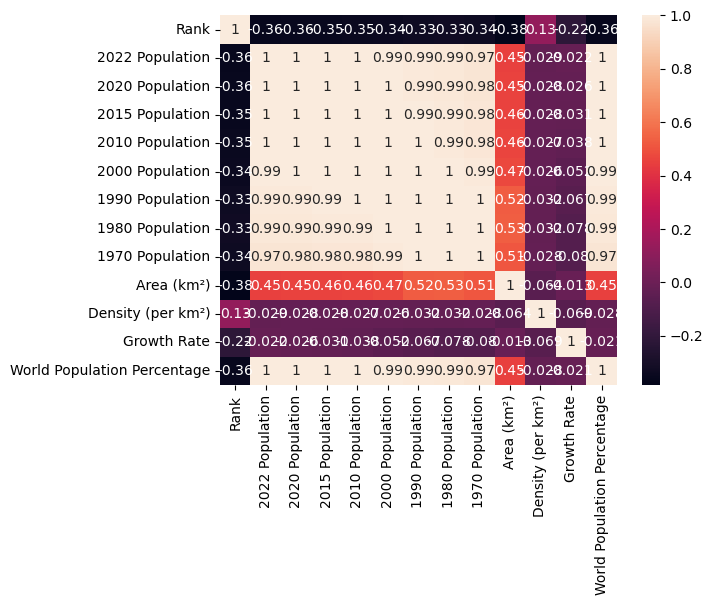

In [363]:
# heatmap - powerful visualization tool used to represent data through color coding in a matrix

sns.heatmap(df.corr(numeric_only=True), annot = True)
plt.rcParams['figure.figsize'] = (10,7)
plt.show()

In [365]:
df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.00,38972230.00,33753499.00,28189672.00,19542982.00,10694796.00,12486631.00,10752971.00,652230.00,63.06,1.03,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.00,2866849.00,2882481.00,2913399.00,3182021.00,3295066.00,2941651.00,2324731.00,28748.00,98.87,1.00,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.00,43451666.00,39543154.00,35856344.00,30774621.00,25518074.00,18739378.00,13795915.00,2381741.00,18.85,1.02,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.00,46189.00,51368.00,54849.00,58230.00,47818.00,32886.00,27075.00,199.00,222.48,0.98,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.00,77700.00,71746.00,71519.00,66097.00,53569.00,35611.00,19860.00,468.00,170.56,1.01,0.00
5,42,AGO,Angola,Luanda,Africa,35588987.00,33428485.00,28127721.00,23364185.00,16394062.00,11828638.00,8330047.00,6029700.00,1246700.00,28.55,1.03,0.45
6,224,AIA,Anguilla,The Valley,North America,15857.00,15585.00,14525.00,13172.00,11047.00,8316.00,6560.00,6283.00,91.00,174.25,1.01,0.00
7,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763.00,92664.00,89941.00,85695.00,75055.00,63328.00,64888.00,64516.00,442.00,212.13,1.01,0.00
8,33,ARG,Argentina,Buenos Aires,South America,45510318.00,45036032.00,43257065.00,41100123.00,37070774.00,32637657.00,28024803.00,23842803.00,2780400.00,16.37,1.01,0.57
9,140,ARM,Armenia,Yerevan,Asia,2780469.00,2805608.00,2878595.00,2946293.00,3168523.00,3556539.00,3135123.00,2534377.00,29743.00,93.48,1.00,0.03


In [385]:
# groupby continent
df.groupby('Continent').mean(numeric_only=True)

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,
Africa,92.16,25455879.68,23871435.26,21419703.57,18898197.31,14598365.95,11376964.52,8586031.98,6567175.27,537879.30,126.41,1.02,0.31
Asia,77.56,96327387.31,94955134.37,89165003.64,89087770.00,80580835.11,48639995.33,40278333.33,43839877.83,642762.82,1025.02,1.01,1.18
Europe,124.50,15055371.82,14915843.92,15027454.12,14712278.68,14817685.71,14785203.94,14200004.52,13118479.82,460208.22,663.32,1.00,0.19
North America,160.93,15007403.40,14855914.82,14259596.25,13568016.28,12151739.60,10531660.62,9207334.03,7885865.15,606104.45,272.49,1.00,0.19
Oceania,188.52,2046386.32,1910148.96,1756664.48,1613163.65,1357512.09,1162774.87,996532.17,846968.26,370220.91,132.54,1.01,0.02
South America,97.57,31201186.29,30823574.50,29509599.71,26789395.54,25015888.69,21224743.93,17270643.29,13781939.71,1301302.85,20.97,1.01,0.39


In [387]:
# search only 'Oceania' from 'Continent' column

df[df['Continent'].str.contains('Oceania')]

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.00,46189.00,51368.00,54849.00,58230.00,47818.00,32886.00,27075.00,199.00,222.48,0.98,0.00
11,55,AUS,Australia,Canberra,Oceania,26177413.00,25670051.00,23820236.00,22019168.00,19017963.00,17048003.00,14706322.00,12595034.00,7692024.00,3.40,1.01,0.33
44,223,COK,Cook Islands,Avarua,Oceania,17011.00,17029.00,17695.00,17212.00,15897.00,17123.00,17651.00,20470.00,236.00,72.08,1.00,0.00
66,162,FJI,Fiji,Suva,Oceania,929766.00,920422.00,917200.00,905169.00,832509.00,780430.00,644582.00,527634.00,18272.00,50.88,1.01,0.01
70,183,PYF,French Polynesia,Papeete,Oceania,306279.00,301920.00,291787.00,283788.00,250927.00,211089.00,163591.00,117891.00,4167.00,73.50,1.01,0.00
81,191,GUM,Guam,Hagåtña,Oceania,171774.00,169231.00,167978.00,164905.00,160188.00,138263.00,110286.00,88300.00,549.00,312.89,1.01,0.00
107,192,KIR,Kiribati,Tarawa,Oceania,131232.00,126463.00,116707.00,107995.00,88826.00,75124.00,60813.00,57437.00,811.00,161.81,1.02,0.00
126,215,MHL,Marshall Islands,Majuro,Oceania,41569.00,43413.00,49410.00,53416.00,54224.00,46047.00,31988.00,23969.00,181.00,229.66,0.99,0.00
132,194,FSM,Micronesia,Palikir,Oceania,114164.00,112106.00,109462.00,107588.00,111709.00,98603.00,76299.00,58989.00,702.00,162.63,1.01,0.00
142,225,NRU,Nauru,Yaren,Oceania,12668.00,12315.00,11185.00,10241.00,10377.00,9598.00,7635.00,6663.00,21.00,603.24,1.01,0.00


In [393]:
# group 'Continent' and sort '2022 Population' in descending order

df2 = df.groupby('Continent').mean(numeric_only = True).sort_values(by="2022 Population", ascending = False)
df2

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,
Asia,77.56,96327387.31,94955134.37,89165003.64,89087770.00,80580835.11,48639995.33,40278333.33,43839877.83,642762.82,1025.02,1.01,1.18
South America,97.57,31201186.29,30823574.50,29509599.71,26789395.54,25015888.69,21224743.93,17270643.29,13781939.71,1301302.85,20.97,1.01,0.39
Africa,92.16,25455879.68,23871435.26,21419703.57,18898197.31,14598365.95,11376964.52,8586031.98,6567175.27,537879.30,126.41,1.02,0.31
Europe,124.50,15055371.82,14915843.92,15027454.12,14712278.68,14817685.71,14785203.94,14200004.52,13118479.82,460208.22,663.32,1.00,0.19
North America,160.93,15007403.40,14855914.82,14259596.25,13568016.28,12151739.60,10531660.62,9207334.03,7885865.15,606104.45,272.49,1.00,0.19
Oceania,188.52,2046386.32,1910148.96,1756664.48,1613163.65,1357512.09,1162774.87,996532.17,846968.26,370220.91,132.54,1.01,0.02


In [401]:
df3 = df2.transpose()
df3

Continent,Asia,South America,Africa,Europe,North America,Oceania
Rank,77.56,97.57,92.16,124.50,160.93,188.52
2022 Population,96327387.31,31201186.29,25455879.68,15055371.82,15007403.40,2046386.32
2020 Population,94955134.37,30823574.50,23871435.26,14915843.92,14855914.82,1910148.96
2015 Population,89165003.64,29509599.71,21419703.57,15027454.12,14259596.25,1756664.48
2010 Population,89087770.00,26789395.54,18898197.31,14712278.68,13568016.28,1613163.65
2000 Population,80580835.11,25015888.69,14598365.95,14817685.71,12151739.60,1357512.09
1990 Population,48639995.33,21224743.93,11376964.52,14785203.94,10531660.62,1162774.87
1980 Population,40278333.33,17270643.29,8586031.98,14200004.52,9207334.03,996532.17
1970 Population,43839877.83,13781939.71,6567175.27,13118479.82,7885865.15,846968.26
Area (km²),642762.82,1301302.85,537879.30,460208.22,606104.45,370220.91


<Axes: xlabel='Continent'>

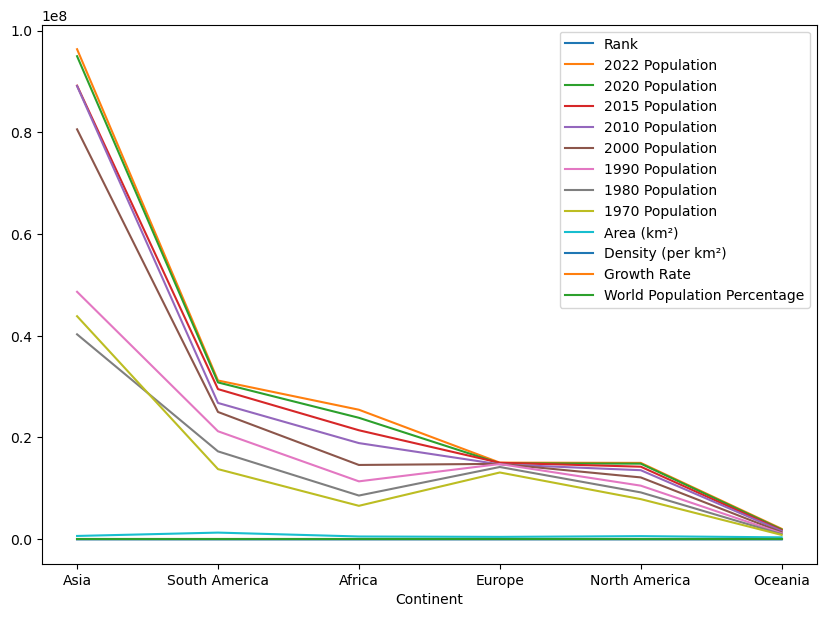

In [399]:
df2.plot()


<Axes: >

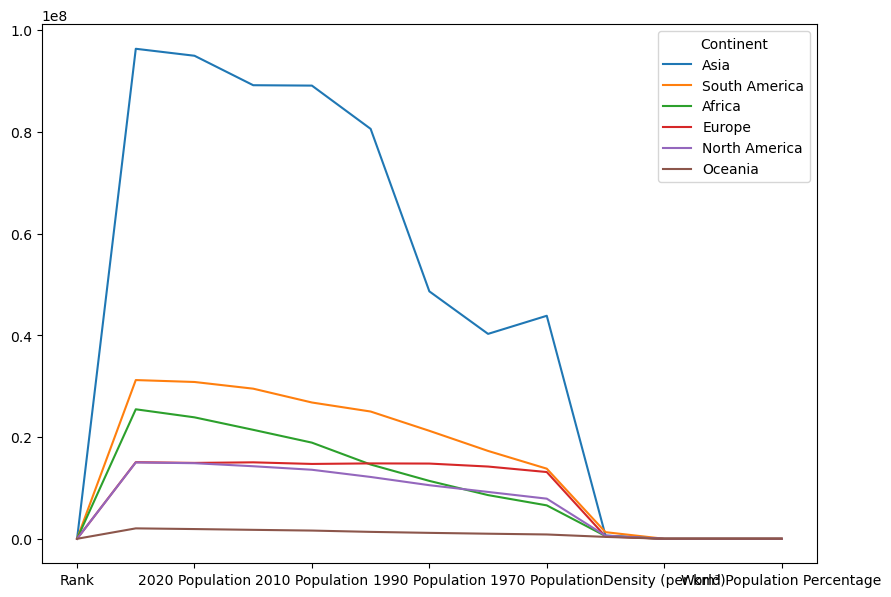

In [403]:
df3.plot()


In [407]:
# To display all the column names

df.columns


Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

In [411]:
#df2 = df.groupby('Continent')[['2022 Population',
#       '2020 Population', '2015 Population', '2010 Population',
#      '2000 Population', '1990 Population', '1980 Population',
#       '1970 Population']].mean(numeric_only = True).sort_values(by="2022 Population", ascending = False)
#df2

#                                            OR

df2 = df.groupby('Continent')[df.columns[5:13]].mean(numeric_only = True).sort_values(by="2022 Population", ascending = False)
df2

,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population
Continent,,,,,,,,
Asia,96327387.31,94955134.37,89165003.64,89087770.00,80580835.11,48639995.33,40278333.33,43839877.83
South America,31201186.29,30823574.50,29509599.71,26789395.54,25015888.69,21224743.93,17270643.29,13781939.71
Africa,25455879.68,23871435.26,21419703.57,18898197.31,14598365.95,11376964.52,8586031.98,6567175.27
Europe,15055371.82,14915843.92,15027454.12,14712278.68,14817685.71,14785203.94,14200004.52,13118479.82
North America,15007403.40,14855914.82,14259596.25,13568016.28,12151739.60,10531660.62,9207334.03,7885865.15
Oceania,2046386.32,1910148.96,1756664.48,1613163.65,1357512.09,1162774.87,996532.17,846968.26


In [413]:
df3 = df2.transpose()
df3

Continent,Asia,South America,Africa,Europe,North America,Oceania
2022 Population,96327387.31,31201186.29,25455879.68,15055371.82,15007403.40,2046386.32
2020 Population,94955134.37,30823574.50,23871435.26,14915843.92,14855914.82,1910148.96
2015 Population,89165003.64,29509599.71,21419703.57,15027454.12,14259596.25,1756664.48
2010 Population,89087770.00,26789395.54,18898197.31,14712278.68,13568016.28,1613163.65
2000 Population,80580835.11,25015888.69,14598365.95,14817685.71,12151739.60,1357512.09
1990 Population,48639995.33,21224743.93,11376964.52,14785203.94,10531660.62,1162774.87
1980 Population,40278333.33,17270643.29,8586031.98,14200004.52,9207334.03,996532.17
1970 Population,43839877.83,13781939.71,6567175.27,13118479.82,7885865.15,846968.26


<Axes: >

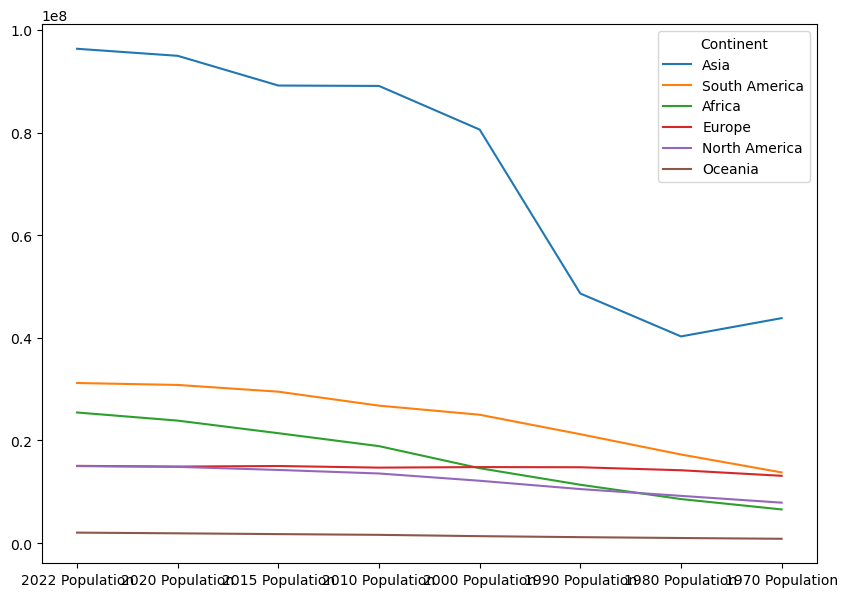

In [415]:
df3.plot()

<Axes: >

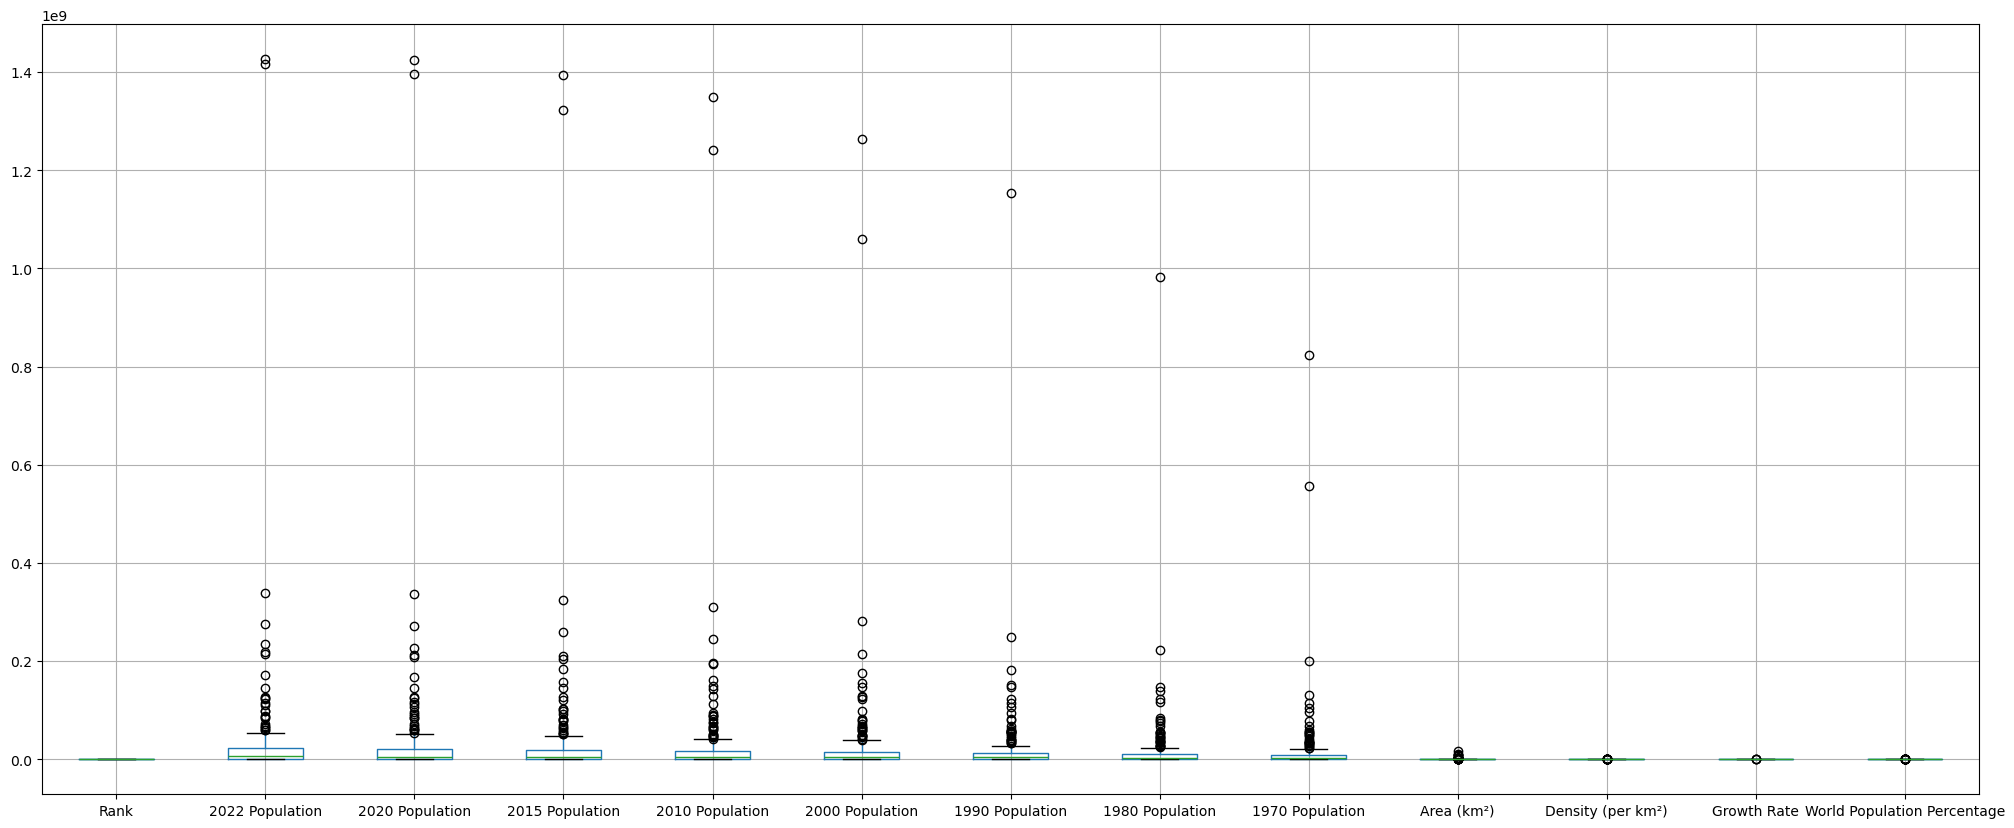

In [425]:
df.boxplot(figsize=(25,10))

In [429]:
# To display data in data type wise

df.select_dtypes(include='object')

,CCA3,Country,Capital,Continent
0,AFG,Afghanistan,Kabul,Asia
1,ALB,Albania,Tirana,Europe
2,DZA,Algeria,Algiers,Africa
3,ASM,American Samoa,Pago Pago,Oceania
4,AND,Andorra,Andorra la Vella,Europe
5,AGO,Angola,Luanda,Africa
6,AIA,Anguilla,The Valley,North America
7,ATG,Antigua and Barbuda,Saint John’s,North America
8,ARG,Argentina,Buenos Aires,South America
9,ARM,Armenia,Yerevan,Asia


In [431]:
df.select_dtypes(include='number')

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,41128771.00,38972230.00,33753499.00,28189672.00,19542982.00,10694796.00,12486631.00,10752971.00,652230.00,63.06,1.03,0.52
1,138,2842321.00,2866849.00,2882481.00,2913399.00,3182021.00,3295066.00,2941651.00,2324731.00,28748.00,98.87,1.00,0.04
2,34,44903225.00,43451666.00,39543154.00,35856344.00,30774621.00,25518074.00,18739378.00,13795915.00,2381741.00,18.85,1.02,0.56
3,213,44273.00,46189.00,51368.00,54849.00,58230.00,47818.00,32886.00,27075.00,199.00,222.48,0.98,0.00
4,203,79824.00,77700.00,71746.00,71519.00,66097.00,53569.00,35611.00,19860.00,468.00,170.56,1.01,0.00
5,42,35588987.00,33428485.00,28127721.00,23364185.00,16394062.00,11828638.00,8330047.00,6029700.00,1246700.00,28.55,1.03,0.45
6,224,15857.00,15585.00,14525.00,13172.00,11047.00,8316.00,6560.00,6283.00,91.00,174.25,1.01,0.00
7,201,93763.00,92664.00,89941.00,85695.00,75055.00,63328.00,64888.00,64516.00,442.00,212.13,1.01,0.00
8,33,45510318.00,45036032.00,43257065.00,41100123.00,37070774.00,32637657.00,28024803.00,23842803.00,2780400.00,16.37,1.01,0.57
9,140,2780469.00,2805608.00,2878595.00,2946293.00,3168523.00,3556539.00,3135123.00,2534377.00,29743.00,93.48,1.00,0.03


In [433]:
df.select_dtypes(include='float')

,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,41128771.00,38972230.00,33753499.00,28189672.00,19542982.00,10694796.00,12486631.00,10752971.00,652230.00,63.06,1.03,0.52
1,2842321.00,2866849.00,2882481.00,2913399.00,3182021.00,3295066.00,2941651.00,2324731.00,28748.00,98.87,1.00,0.04
2,44903225.00,43451666.00,39543154.00,35856344.00,30774621.00,25518074.00,18739378.00,13795915.00,2381741.00,18.85,1.02,0.56
3,44273.00,46189.00,51368.00,54849.00,58230.00,47818.00,32886.00,27075.00,199.00,222.48,0.98,0.00
4,79824.00,77700.00,71746.00,71519.00,66097.00,53569.00,35611.00,19860.00,468.00,170.56,1.01,0.00
5,35588987.00,33428485.00,28127721.00,23364185.00,16394062.00,11828638.00,8330047.00,6029700.00,1246700.00,28.55,1.03,0.45
6,15857.00,15585.00,14525.00,13172.00,11047.00,8316.00,6560.00,6283.00,91.00,174.25,1.01,0.00
7,93763.00,92664.00,89941.00,85695.00,75055.00,63328.00,64888.00,64516.00,442.00,212.13,1.01,0.00
8,45510318.00,45036032.00,43257065.00,41100123.00,37070774.00,32637657.00,28024803.00,23842803.00,2780400.00,16.37,1.01,0.57
9,2780469.00,2805608.00,2878595.00,2946293.00,3168523.00,3556539.00,3135123.00,2534377.00,29743.00,93.48,1.00,0.03


In [435]:
df.select_dtypes(include='int')

,Rank
0,36
1,138
2,34
3,213
4,203
5,42
6,224
7,201
8,33
9,140
